In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from experiments.interpretation.interpretation_util import (
    ExperimentFiles,
    ExperimentFolders,
)


notebook_dir = os.path.abspath("")

file_path = os.path.abspath(
    os.path.join(
        notebook_dir,
        "..",
        "results",
        "experiments",
        ExperimentFolders.O3,
        ExperimentFiles.ALL_TOOLS_MCP_SEQ,
    )
)


# Load JSON data (as list of dicts)
with open(file_path) as f:
    data = json.load(f)

df = pd.DataFrame(data)

# Data preparation

In [2]:
# Helper function to count contained and total facts
def count_facts(fact_list):
    if not isinstance(fact_list, list):
        return 0, 0
    total = len(fact_list)
    contained = sum(f.get("is_contained", False) for f in fact_list)
    return contained, total


# Apply to dataframe
df["direct_facts_contained"], df["direct_facts_total"] = zip(
    *df["fact_score.direct_facts"].apply(count_facts)
)
df["supporting_facts_contained"], df["supporting_facts_total"] = zip(
    *df["fact_score.supporting_facts"].apply(count_facts)
)

import numpy as np

# Define conditions based on the 'id' prefix
conditions = [
    df["id"].str.startswith("EA"),
    df["id"].str.startswith("MS"),
    df["id"].str.startswith("PS"),
    df["id"].str.startswith("STC"),
]

# Corresponding labels
labels = [
    "Extensibility Assistance",
    "Malaysia Support",
    "Peppol Support",
    "Settlement Cases",
]

# Create the new column
df["case_type"] = np.select(conditions, labels, default="Unknown")

df = df.sort_values(by="id")

In [40]:
# Define mapping for 'product' column
product_map = {
    "ERP (only SAP S/4HANA Cloud Public Edition)": "Public Cloud",
    "ERP (excluding SAP S/4HANA Cloud Public Edition)": "Non Public Cloud",
    "ERP": "All ERPs",
    "Peppol Service on Business Technology Platform": "Peppol",
    "DRC Cloud Edition on Business Technology Platform": "DRC",
    "Other": "Other",
}

# Apply mapping
df["product"] = df["product"].map(product_map).fillna(df["product"])

In [42]:
# Define mapping for 'category' column
category_map = {
    "How to Develop (Maintenance - Customer case support)": "How to Develop",
    "Documentation (Maintenance - Customer case support)": "Documentation",
    "Analysis (Development)": "Analysis",
    "How to Configure (Maintenance - Customer case support)": "How to Configure",
    "Initial error explanation and cause analysis (Maintenance - Customer case support)": "Error explanation & analysis",
    "Coding (Development)": "Coding",
}

# Apply mapping
df["category"] = df["category"].map(category_map).fillna(df["category"])

In [44]:
# Define mapping for 'persona' column
persona_map = {
    "Developer (Customer side)": "Customer Developer",
    "Functional consultant (Customer side)": "Functional Consultant",
    "Architects (Software vendor side)": "Vendor Architect",
    "Developer (Software vendor side)": "Vendor Developer",
}

# Apply mapping
df["persona"] = df["persona"].map(persona_map).fillna(df["persona"])

# Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 63
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         91 non-null     object 
 1   question                                   91 non-null     object 
 2   answer                                     91 non-null     object 
 3   product                                    91 non-null     object 
 4   category                                   91 non-null     object 
 5   persona                                    91 non-null     object 
 6   activity                                   91 non-null     object 
 7   country                                    91 non-null     object 
 8   facts                                      91 non-null     object 
 9   bert_score                                 91 non-null     float64
 10  agent_judge_outcome              

In [4]:
df

,id,question,answer,product,category,persona,activity,country,facts,bert_score,...,agent_judge_tokens_consumed.output_tokens,agent_judge_tokens_consumed.total_tokens,tokens_consumed.input_tokens,tokens_consumed.output_tokens,tokens_consumed.total_tokens,direct_facts_contained,direct_facts_total,supporting_facts_contained,supporting_facts_total,case_type
0,EA-1,How can I attach additional files to standard ...,To attach additional files to the standard XML...,ERP (only SAP S/4HANA Cloud Public Edition),How to Develop (Maintenance - Customer case su...,Developer (Customer side),Custom Development,Cross,[{'fact': 'You can attach additional files to ...,0.097456,...,3,6811,17185,3151,20336,1,3,1,5,Extensibility Assistance
9,EA-10,What BAdIs can be used to extend the Manage El...,The BAdIs EDOC_CUSTOM_FIELDS_CLOUD and EDOC_CU...,ERP (only SAP S/4HANA Cloud Public Edition),How to Develop (Maintenance - Customer case su...,Developer (Customer side),Custom Development,Cross,[{'fact': 'The BAdI EDOC_CUSTOM_FIELDS_CLOUD c...,0.170508,...,3,16244,21438,2260,23698,2,2,0,0,Extensibility Assistance
10,EA-11,"As a Public Cloud customer in Spain, can I ext...","Yes, as a Public Cloud customer in Spain, you ...",ERP (only SAP S/4HANA Cloud Public Edition),Documentation (Maintenance - Customer case sup...,Developer (Customer side),Custom Development,ES,[{'fact': 'As a Public Cloud customer in Spain...,0.168249,...,3,5657,8266,2463,10729,1,1,2,3,Extensibility Assistance
11,EA-12,What are the steps to extend an existing eDocu...,Prerequisites\n1. SAP S/4HANA Cloud Public Edi...,ERP (only SAP S/4HANA Cloud Public Edition),How to Develop (Maintenance - Customer case su...,Developer (Customer side),Custom Development,Cross,[{'fact': 'SAP S/4HANA Cloud Public Edition is...,0.066796,...,3,17216,18467,2286,20753,4,4,0,2,Extensibility Assistance
12,EA-13,Can I restrict the visibility of eDocuments in...,"Yes, you can restrict the visibility of eDocum...",ERP,How to Develop (Maintenance - Customer case su...,Developer (Customer side),Custom Development,Cross,[{'fact': 'You can restrict the visibility of ...,0.226840,...,3,5588,15720,3058,18778,3,3,3,3,Extensibility Assistance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,STC-5,"I want to see, how the enablement for source t...",First you need to make the Settlement Manageme...,ERP,Coding (Development),Developer (Software vendor side),Development,FR,[{'fact': 'The enablement for source type 'Set...,0.615248,...,3,16412,8061,1180,9241,3,4,2,2,Settlement Cases
61,STC-6,"To enable source type ""Settlement Management D...",Enhance the method DETERMINE_PROCESS in class ...,ERP,Coding (Development),Developer (Software vendor side),Development,FR,[{'fact': 'The method DETERMINE_PROCESS in cla...,0.633748,...,3,9498,6414,656,7070,3,3,4,4,Settlement Cases
62,STC-7,"To enable source type ""Settlement Management D...",Enhance the method DETERMINE_PAYMENT_PROCESS i...,ERP,Analysis (Development),Developer (Software vendor side),Development,FR,[{'fact': 'The method DETERMINE_PAYMENT_PROCES...,0.306437,...,3,11047,6851,802,7653,3,3,0,5,Settlement Cases
74,STC-8,"To enable source type ""Settlement Management D...","To create the mapping, you need to create a cl...",ERP,Analysis (Development),Developer (Software vendor side),Development,FR,[{'fact': 'To enable source type 'Settlement M...,0.616811,...,3,5301,14878,1242,16120,3,5,3,3,Settlement Cases


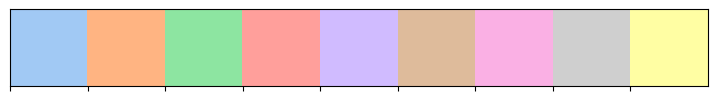

In [17]:
my_palette = sns.color_palette("pastel", 9)

sns.palplot(my_palette)

# Distribution of Direct Fact Scores by Categories

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def plot_factscore_by_group(df, group_col, palette_color):
    """
    Plots a styled boxplot of fact_score.direct_fact_score grouped by the specified column,
    including mean/median lines and sample size annotations.

    Parameters:
        df (pd.DataFrame): Input dataframe.
        group_col (str): Column name to group by (must be categorical).
        palette_color: Color used for boxplot fill (e.g., my_palette[7]).
    """
    # Define group order from appearance in the data
    group_order = df[group_col].value_counts().loc[lambda x: x.index].index.tolist()

    plt.figure(figsize=(7, 5))

    # Draw boxplot
    ax = sns.boxplot(
        data=df,
        x=group_col,
        y="fact_score.direct_fact_score",
        order=group_order,
        color=palette_color,
        linewidth=1.5,
        showfliers=False,
        whis=[0, 100],
    )

    # Compute group statistics
    grouped = df.groupby(group_col)["fact_score.direct_fact_score"]
    medians = grouped.median()
    means = grouped.mean()
    counts = df[group_col].value_counts()

    # Annotate mean and median lines, and counts
    for x, group in enumerate(group_order):
        mean = means[group]
        median = medians[group]
        count = counts[group]

        # Mean line
        ax.hlines(
            mean,
            x - 0.4,
            x + 0.4,
            colors="black",
            linestyles="--",
            linewidth=2,
        )
        plt.text(
            x,
            mean + 0.015,
            f"{mean:.2f}",
            color="black",
            va="bottom",
            fontsize=9,
            ha="center",
        )

        # Median line
        ax.hlines(
            median,
            x - 0.4,
            x + 0.4,
            colors="black",
            linestyles="-",
            linewidth=1.5,
        )
        plt.text(
            x,
            median + 0.015,
            f"{median:.2f}",
            color="black",
            va="bottom",
            fontsize=9,
            ha="center",
        )

        # Count below x-axis tick
        plt.text(
            x,
            -0.05,  # slightly below zero
            f"n={count}",
            color="gray",
            fontsize=8,
            ha="center",
        )

    # Axes formatting
    plt.xlabel("")
    plt.ylabel("Direct FactScore")
    plt.ylim(-0.1, 1)  # Extended lower bound to accommodate count labels
    plt.xticks(rotation=45, ha="right")

    # Legend
    legend = ax.legend(
        handles=[
            plt.Line2D(
                [0], [0], color="black", linestyle="--", linewidth=2, label="Mean"
            ),
            plt.Line2D(
                [0], [0], color="black", linestyle="-", linewidth=1.5, label="Median"
            ),
        ],
        loc="upper right",
        fontsize=8,
        frameon=True,
    )
    legend.get_frame().set_facecolor("white")
    legend.get_frame().set_alpha(0.5)
    legend.get_frame().set_edgecolor("gray")

    plt.tight_layout()
    plt.show()

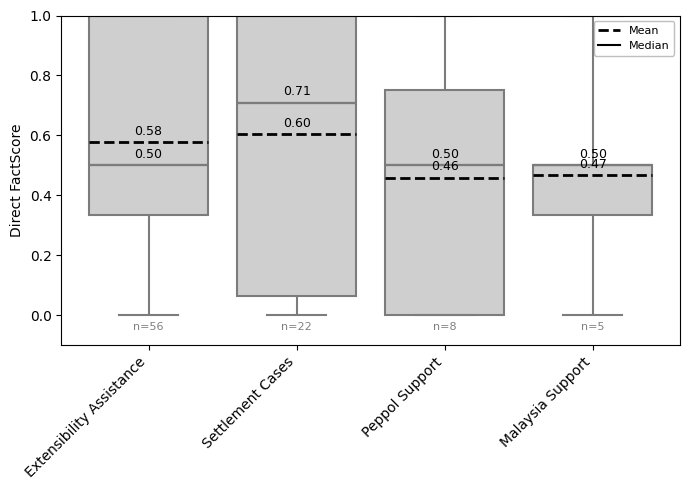

In [68]:
plot_factscore_by_group(df, group_col="case_type", palette_color=my_palette[7])

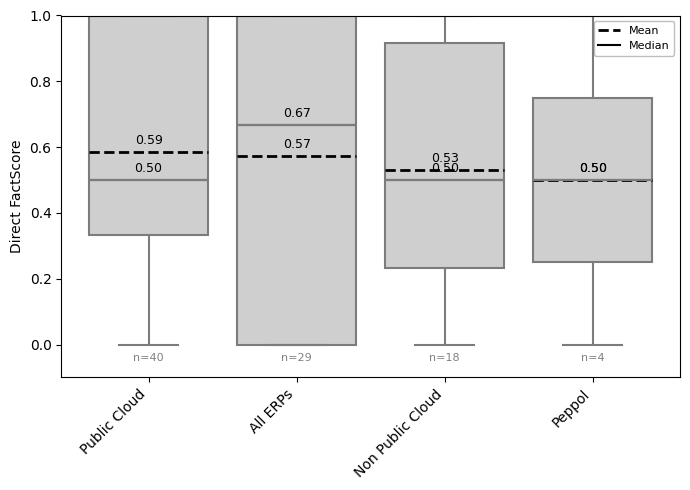

In [67]:
plot_factscore_by_group(df, group_col="product", palette_color=my_palette[7])

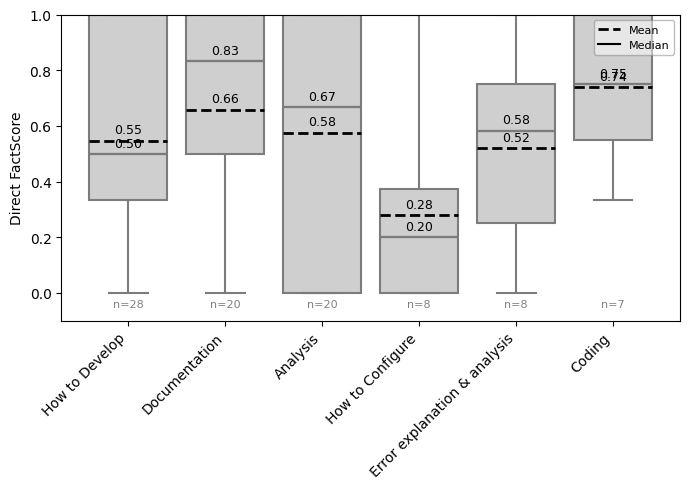

In [69]:
plot_factscore_by_group(df, group_col="category", palette_color=my_palette[7])

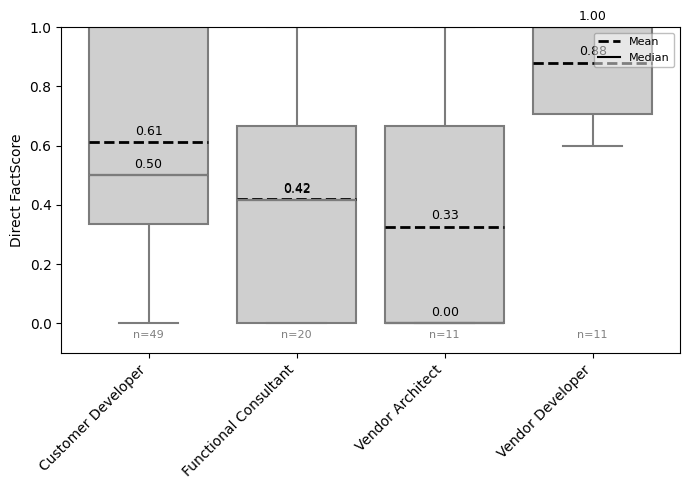

In [70]:
plot_factscore_by_group(df, group_col="persona", palette_color=my_palette[7])

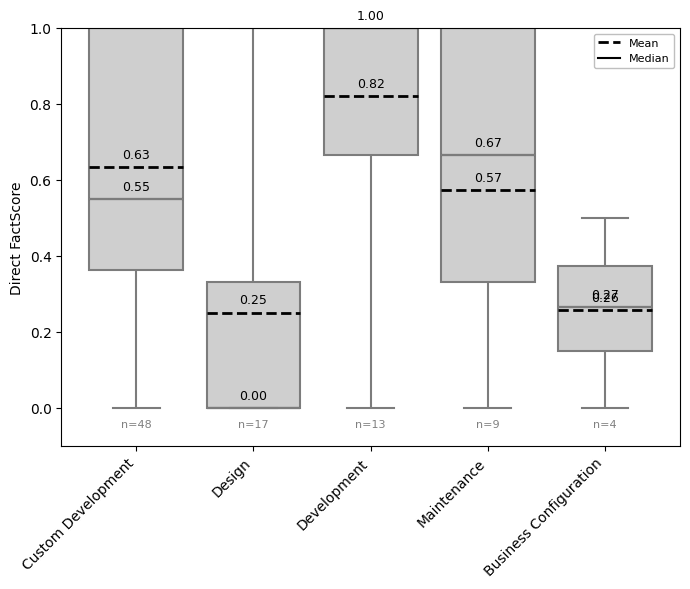

In [36]:
plot_factscore_by_group(df, group_col="activity", palette_color=my_palette[7])

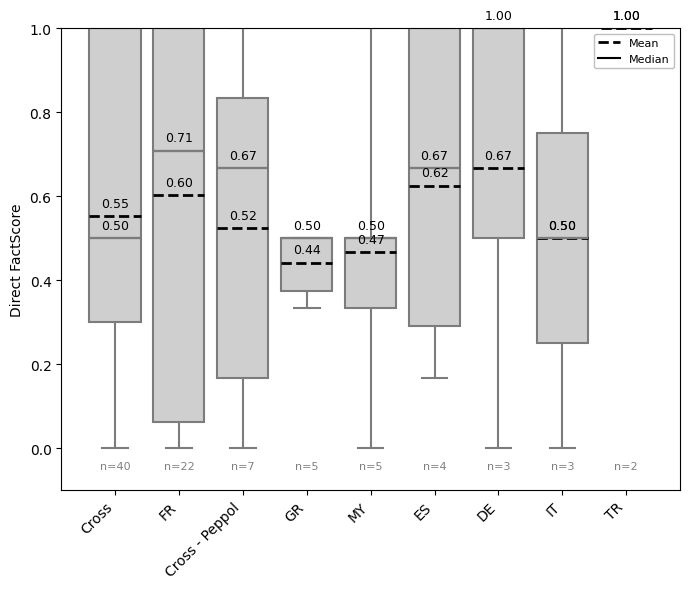

In [39]:
plot_factscore_by_group(df, group_col="country", palette_color=my_palette[7])

# Stacked Distribution of Agent Outcomes by Case Type

In [58]:
import matplotlib.pyplot as plt


def plot_stacked_percentage_distribution(df, group_col, palette):
    desired_order = ["Not Helpful", "Partially Helpful", "Fully Helpful"]

    # Group and pivot counts
    grouped = (
        df.groupby([group_col, "agent_judge_outcome"]).size().unstack(fill_value=0)
    )

    # Keep only desired columns present in the data
    available_cols = [col for col in desired_order if col in grouped.columns]
    grouped = grouped[available_cols]

    # Convert counts to percentages row-wise
    percent_data = grouped.div(grouped.sum(axis=1), axis=0) * 100

    if percent_data.empty:
        print("Warning: No data to plot after processing.")
        return

    plt.figure(figsize=(7, 4))
    bottom = [0] * len(percent_data)

    for idx, outcome in enumerate(available_cols):
        values = percent_data[outcome].values
        plt.bar(
            percent_data.index,
            values,
            bottom=bottom,
            label=outcome,
            color=palette[idx],
            edgecolor="gray",
        )

        # Annotate percentages
        for i, (val, btm) in enumerate(zip(values, bottom)):
            if val >= 5:
                plt.text(
                    i,
                    btm + val / 2,
                    f"{val:.0f}%",
                    ha="center",
                    va="center",
                    fontsize=8,
                    color="black",
                )

        bottom = [btm + val for btm, val in zip(bottom, values)]

    # Annotate total counts on top of bars
    total_counts = grouped.sum(axis=1).values
    for i, count in enumerate(total_counts):
        plt.text(
            i,
            102,  # Slightly above 100%
            f"n={count}",
            ha="center",
            va="bottom",
            fontsize=9,
            color="gray",
        )

    plt.ylim(0, 110)  # Add some headroom for the counts above 100%
    plt.xticks(rotation=45, ha="right")
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=8)
    plt.tight_layout()
    plt.show()

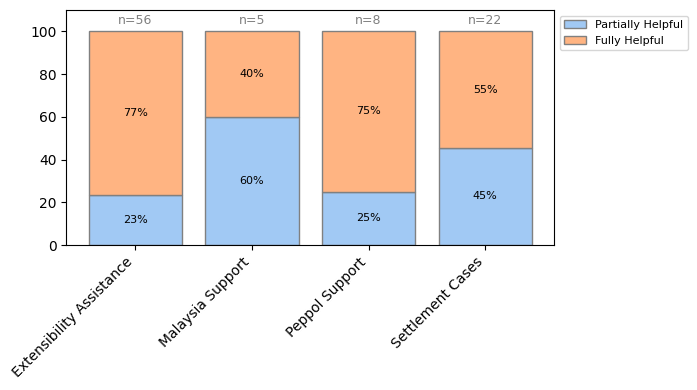

In [ ]:
plot_stacked_percentage_distribution(df, group_col="case_type", palette=my_palette)

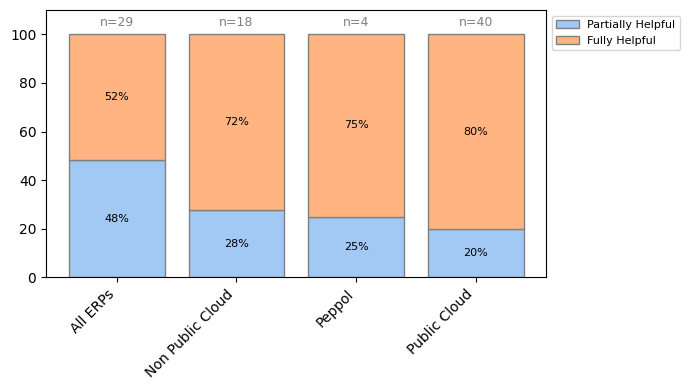

In [63]:
plot_stacked_percentage_distribution(df, group_col="product", palette=my_palette)

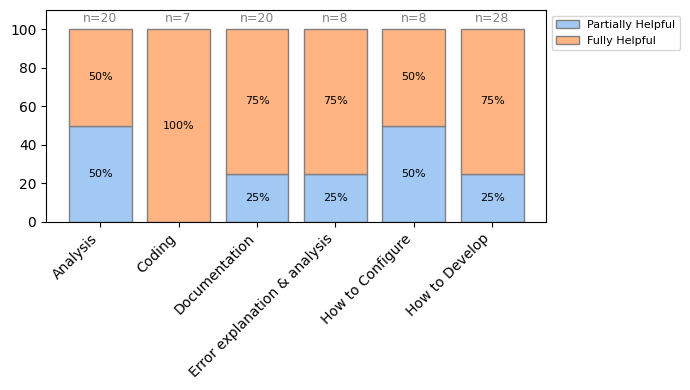

In [59]:
plot_stacked_percentage_distribution(df, group_col="category", palette=my_palette)

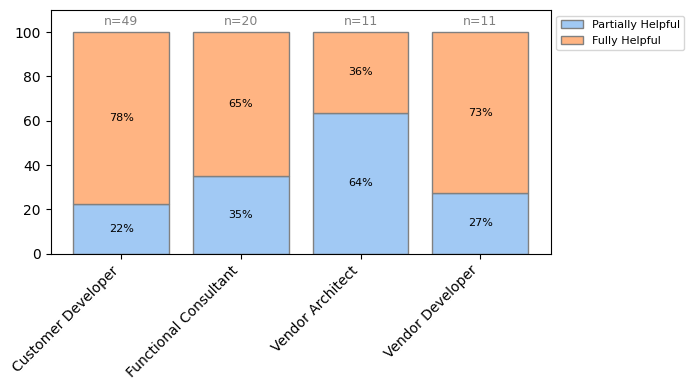

In [ ]:
plot_stacked_percentage_distribution(df, group_col="persona", palette=my_palette)

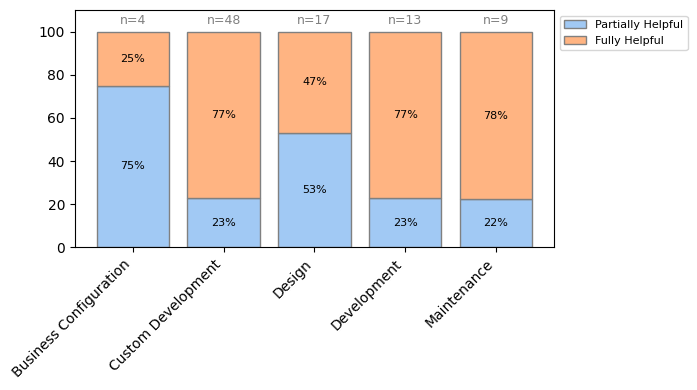

In [61]:
plot_stacked_percentage_distribution(df, group_col="activity", palette=my_palette)

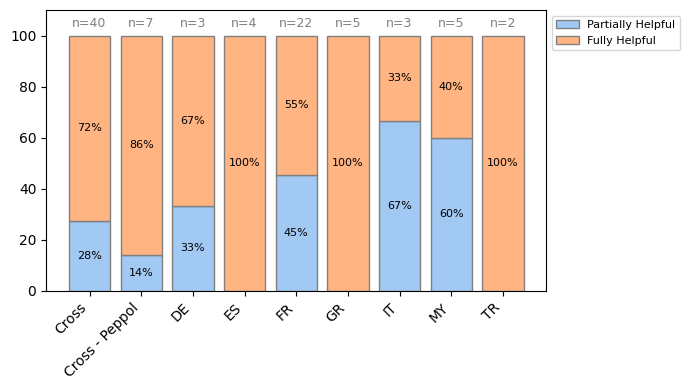

In [64]:
plot_stacked_percentage_distribution(df, group_col="country", palette=my_palette)

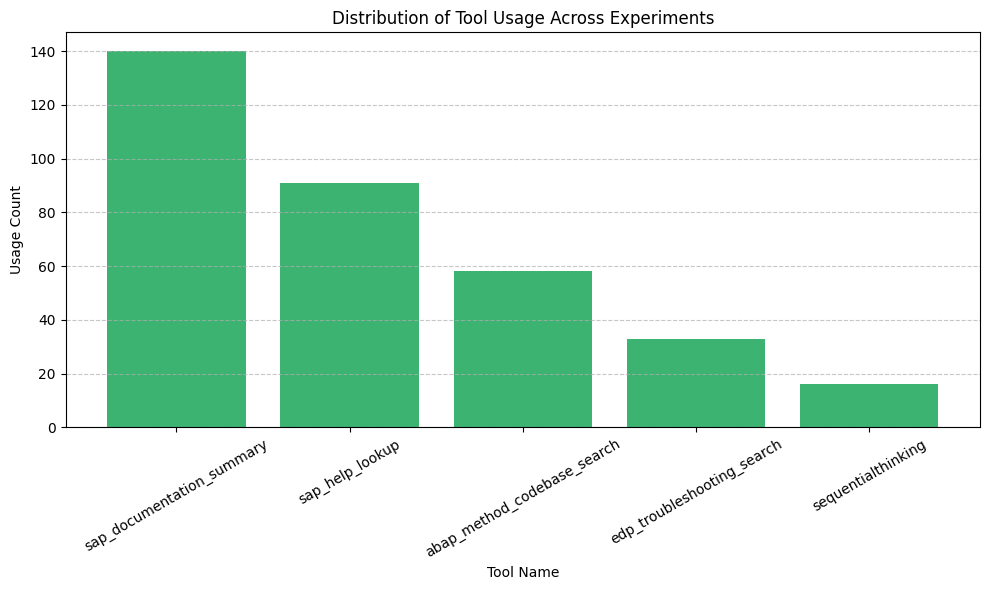

In [74]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Initialize counter
tool_counts = Counter()

# Loop through each list of tools
for tools_list in df["tools_used"]:
    if isinstance(tools_list, list):
        for tool in tools_list:
            tool_name = tool.get("tool_name")
            if tool_name:
                tool_counts[tool_name] += 1

# Convert to DataFrame
tool_df = pd.DataFrame(tool_counts.items(), columns=["Tool Name", "Usage Count"])
tool_df = tool_df.sort_values(by="Usage Count", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(tool_df["Tool Name"], tool_df["Usage Count"], color="mediumseagreen")
plt.title("Distribution of Tool Usage Across Experiments")
plt.xlabel("Tool Name")
plt.ylabel("Usage Count")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# BERT Score per Experiment

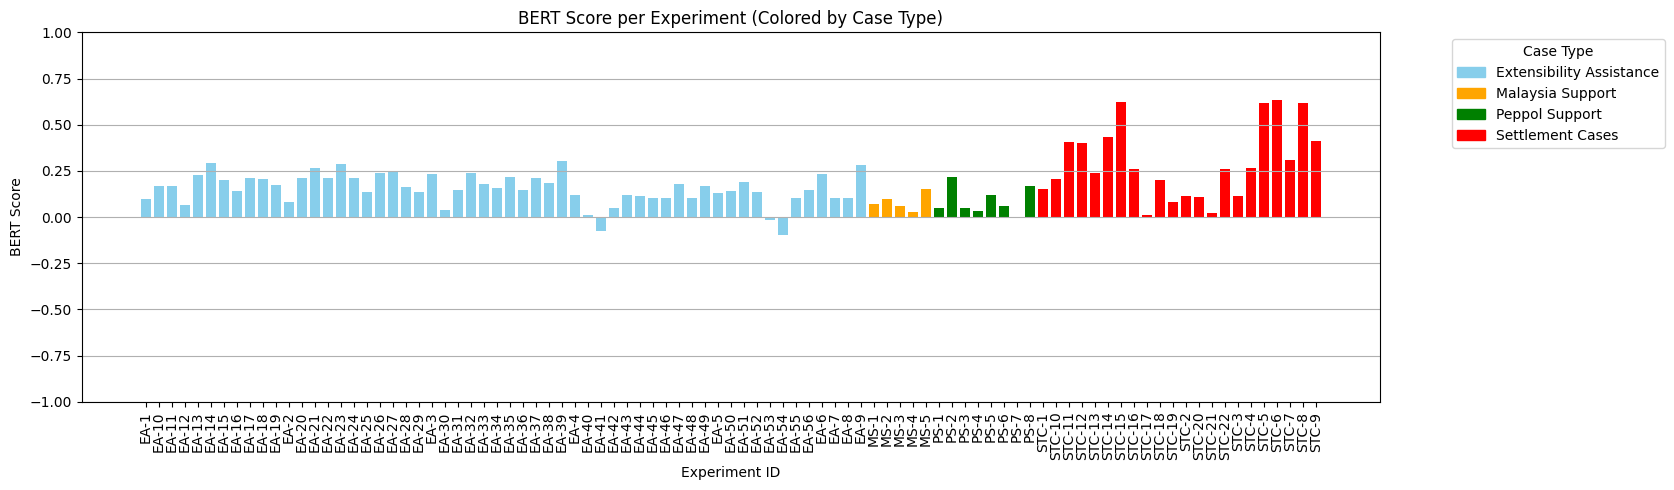

In [10]:
import matplotlib.pyplot as plt

# Define colors for each case_type
case_colors = {
    "Extensibility Assistance": "skyblue",
    "Malaysia Support": "orange",
    "Peppol Support": "green",
    "Settlement Cases": "red",
}

# Map colors to case_type
colors = df["case_type"].map(case_colors)

plt.figure(figsize=(14, 5))
plt.bar(df["id"], df["bert_score"], color=colors)
plt.xlabel("Experiment ID")
plt.ylabel("BERT Score")
plt.title("BERT Score per Experiment (Colored by Case Type)")
plt.ylim(-1, 1)
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.tight_layout()

# Create custom legend
from matplotlib.patches import Patch

legend_handles = [
    Patch(color=color, label=label) for label, color in case_colors.items()
]
plt.legend(
    handles=legend_handles,
    title="Case Type",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

plt.show()

# Fact Contained per Experiment

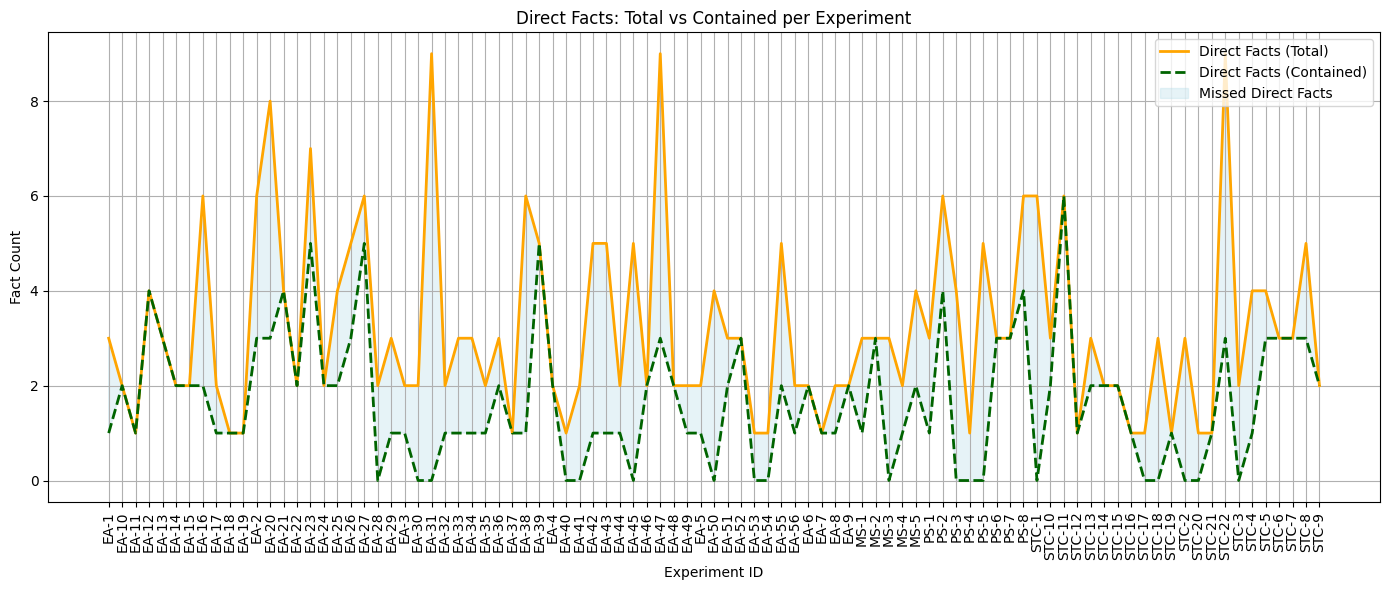

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df))

plt.figure(figsize=(14, 6))

# Plot total and contained
plt.plot(
    x,
    df["direct_facts_total"],
    label="Direct Facts (Total)",
    color="orange",
    linewidth=2,
)
plt.plot(
    x,
    df["direct_facts_contained"],
    label="Direct Facts (Contained)",
    color="darkgreen",
    linestyle="--",
    linewidth=2,
)

# Fill area between lines
plt.fill_between(
    x,
    df["direct_facts_total"],
    df["direct_facts_contained"],
    where=(df["direct_facts_total"] > df["direct_facts_contained"]),
    interpolate=True,
    color="lightblue",
    alpha=0.3,
    label="Missed Direct Facts",
)

plt.xticks(x, df["id"], rotation=90)
plt.title("Direct Facts: Total vs Contained per Experiment")
plt.xlabel("Experiment ID")
plt.ylabel("Fact Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Time consumed for run

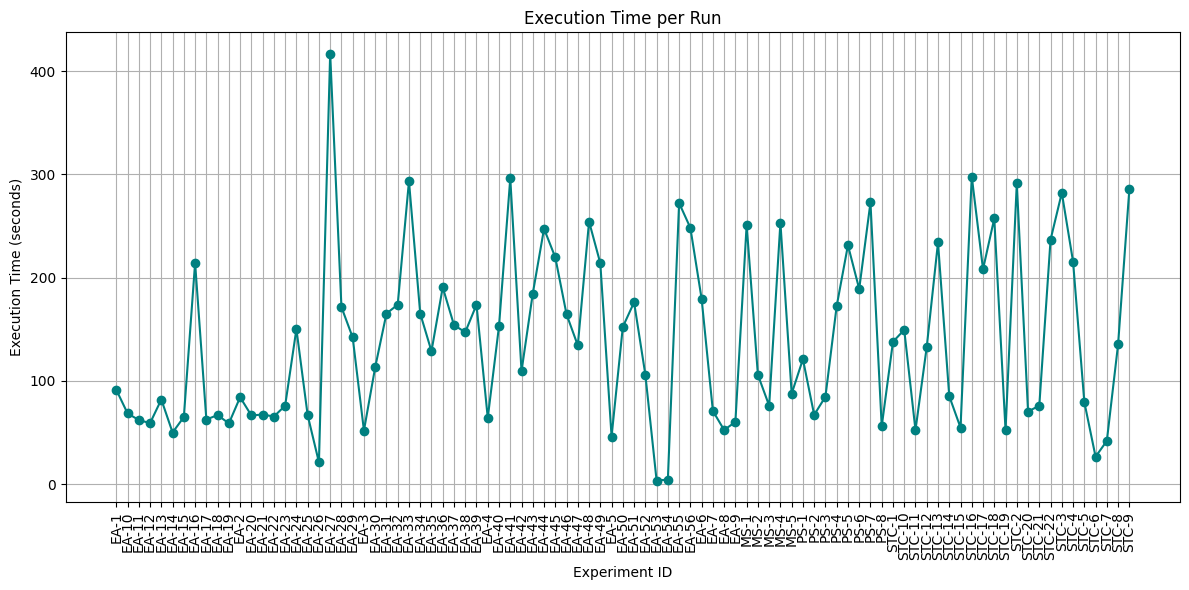

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(
    df["id"], df["excecution_time_seconds"], marker="o", linestyle="-", color="teal"
)

plt.title("Execution Time per Run")
plt.xlabel("Experiment ID")
plt.ylabel("Execution Time (seconds)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

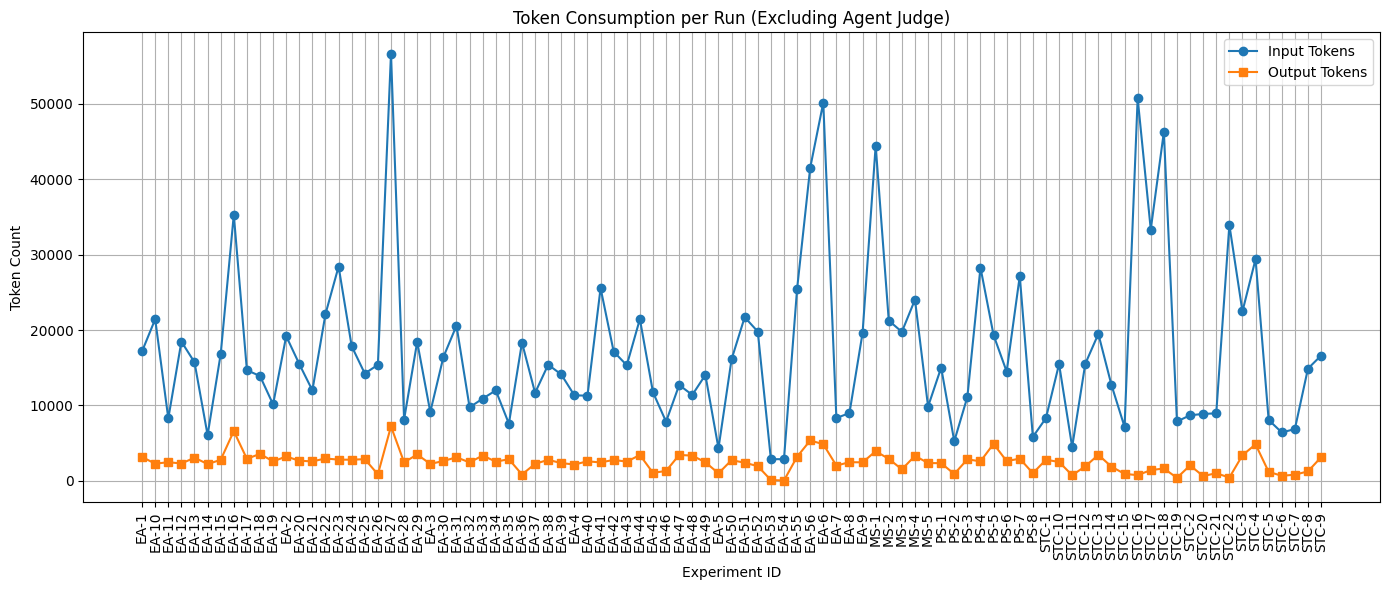

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))


# Plot input, output, and total tokens
plt.plot(
    df["id"],
    df["tokens_consumed.input_tokens"],
    label="Input Tokens",
    marker="o",
)
plt.plot(
    df["id"],
    df["tokens_consumed.output_tokens"],
    label="Output Tokens",
    marker="s",
)

plt.title("Token Consumption per Run (Excluding Agent Judge)")
plt.xlabel("Experiment ID")
plt.ylabel("Token Count")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()